In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from utils import sweep_2, construct_2

In [3]:
from matplotlib.colors import LinearSegmentedColormap
cmap0 = LinearSegmentedColormap.from_list("", ["white", "black"])

In [69]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

In [5]:
""" If they begin by both cooperating for any learning rate >0 and <1 they will start with defection and eventually cooperate

higher learning rate makes the initial defection period shorter"""

' If they begin by both cooperating for any learning rate >0 and <1 they will start with defection and eventually cooperate\n\nhigher learning rate makes the initial defection period shorter'

In [53]:
T = 1000
agent_1, agent_2, D = construct_2(lr_pB = 0.3,lr_pB_2 = 0.3, factors_to_learn="all")
from pymdp import utils
C = utils.obj_array(1)
C[0] = np.array([3, 1, 10, 2])
agent_1.C = C
agent_2.C = C

actions_over_time, B1_over_time, q_pi_over_time, q_s_over_time = sweep_2(agent_1, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=T, sample_style = 'deterministic')


In [98]:
T = 1000
agent_1, agent_2, D = construct_2(lr_pB = 0.65,lr_pB_2 = 0.6, factors_to_learn="all")
from pymdp import utils
C = utils.obj_array(1)
C[0] = np.array([3, 1, 4, 2])
agent_1.C = C
agent_2.C = C

actions_over_time, B1_over_time, q_pi_over_time, q_s_over_time = sweep_2(agent_1, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=T, sample_style = 'deterministic')


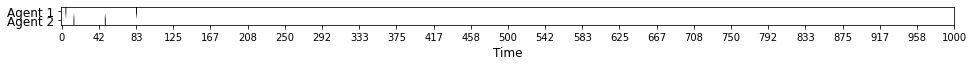

In [99]:

fig, ax = plt.subplots(figsize = (16,15))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 12)
ax.set_xticks(np.linspace(0,T,25),fontsize = 12)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 12)
plt.show()

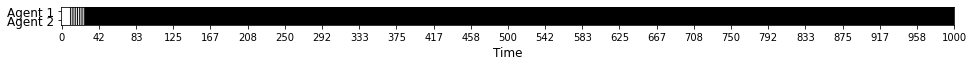

In [56]:

fig, ax = plt.subplots(figsize = (16,15))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 12)
ax.set_xticks(np.linspace(0,T,25),fontsize = 12)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 12)
plt.show()

In [26]:
B1_over_time.shape

(417, 4, 4, 2, 2)

In [27]:
B1_over_time[382,:,:,1,:]

array([[[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.3125    , 0.33333333],
        [0.22727273, 0.25      ],
        [0.22727273, 0.25      ],
        [0.00752212, 0.00795756]],

       [[0.6875    , 0.66666667],
        [0.77272727, 0.75      ],
        [0.77272727, 0.75      ],
        [0.99247788, 0.99204244]]])

In [38]:
q_pi_over_time[381:384,:,0]

array([[0.24913202, 0.75086798],
       [0.24954463, 0.75045537],
       [0.00851199, 0.99148801]])

In [39]:
q_pi_over_time[381:384,:,1]

array([[0.49954345, 0.50045655],
       [0.50012116, 0.49987884],
       [0.00271294, 0.99728706]])

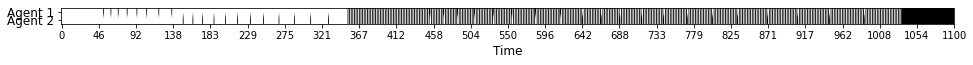

In [108]:

fig, ax = plt.subplots(figsize = (16,15))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 12)
ax.set_xticks(np.linspace(0,T,25),fontsize = 12)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 12)
plt.show()

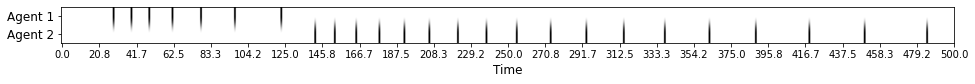

In [96]:

fig, ax = plt.subplots(figsize = (16,15))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 12)
ax.set_xticks(np.linspace(0,T,25),fontsize = 12)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 12)
plt.show()

In [49]:
B1_over_time.shape

(1000, 4, 4, 2, 2)

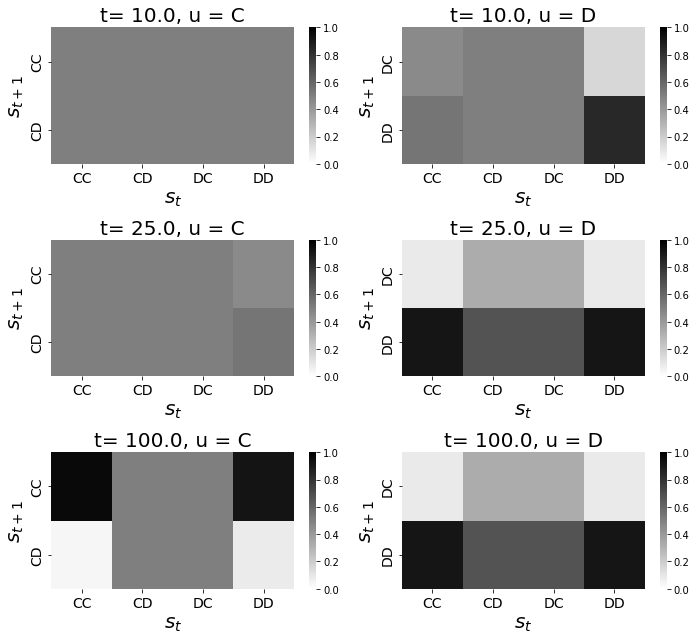

In [21]:
def set_labels(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['CC','CD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

def set_labels_2(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['DC','DD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

fig, ax = plt.subplots(3,2, figsize = (10,9))

img1 = sns.heatmap(B1_over_time[10,:2,:,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B1_over_time[25,2:,:,1,0],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B1_over_time[50,:2,:,0,0],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B1_over_time[400,2:,:,1,0],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B1_over_time[500,:2,:,0,0],ax =ax[2,0], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B1_over_time[750,2:,:,1,0],ax =ax[2,1], cmap = cmap0, vmin = 0, vmax =1)

ax[0,0].set_title('t= 10.0, u = C',fontsize =20)
ax[0,1].set_title('t= 10.0, u = D',fontsize =20)

ax[1,0].set_title('t= 25.0, u = C',fontsize =20)
ax[1,1].set_title('t= 25.0, u = D',fontsize =20)
ax[2,0].set_title('t= 100.0, u = C',fontsize =20)
ax[2,1].set_title('t= 100.0, u = D',fontsize =20)

set_labels(ax[0,0])
set_labels_2(ax[0,1])
set_labels(ax[1,0])
set_labels_2(ax[1,1])
set_labels(ax[2,0])
set_labels_2(ax[2,1])

fig.tight_layout()
plt.savefig("Learned Transitions")



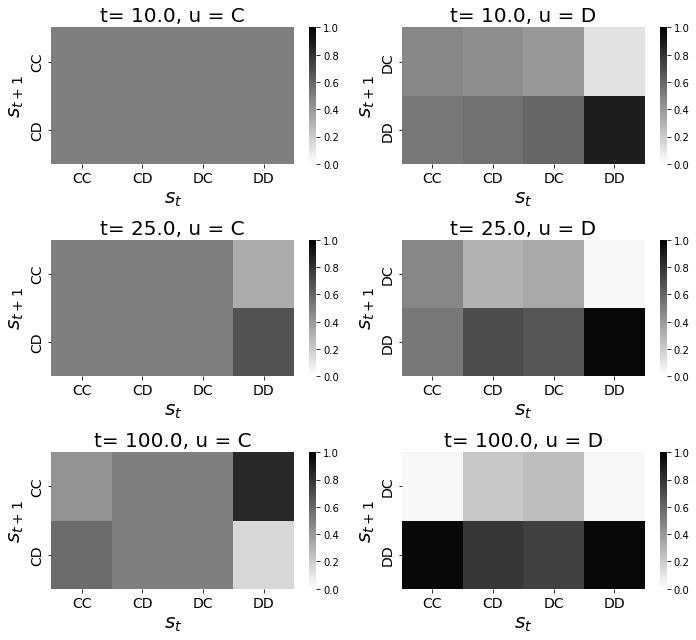

In [63]:
def set_labels(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['CC','CD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

def set_labels_2(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['DC','DD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

fig, ax = plt.subplots(3,2, figsize = (10,9))

img1 = sns.heatmap(B1_over_time[10,:2,:,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B1_over_time[100,2:,:,1,0],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B1_over_time[300,:2,:,0,0],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B1_over_time[500,2:,:,1,0],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B1_over_time[700,:2,:,0,0],ax =ax[2,0], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B1_over_time[1499,2:,:,1,0],ax =ax[2,1], cmap = cmap0, vmin = 0, vmax =1)

ax[0,0].set_title('t= 10.0, u = C',fontsize =20)
ax[0,1].set_title('t= 10.0, u = D',fontsize =20)

ax[1,0].set_title('t= 25.0, u = C',fontsize =20)
ax[1,1].set_title('t= 25.0, u = D',fontsize =20)
ax[2,0].set_title('t= 100.0, u = C',fontsize =20)
ax[2,1].set_title('t= 100.0, u = D',fontsize =20)

set_labels(ax[0,0])
set_labels_2(ax[0,1])
set_labels(ax[1,0])
set_labels_2(ax[1,1])
set_labels(ax[2,0])
set_labels_2(ax[2,1])

fig.tight_layout()
plt.savefig("Learned Transitions")



In [57]:
actions_over_time_all = np.load('actions_over_time_all.npy')
B1_over_time_all = np.load('B1_over_time_all.npy')
q_pi_over_time_all = np.load('q_pi_over_time_all.npy')

In [58]:
actions_over_time_all.shape 

(2000, 2, 30, 30, 1)

In [130]:
time_metric = np.zeros((30,30))

for lr_1 in range(30):
    for lr_2 in range(30):
        current = actions_over_time_all[:,1,lr_1,lr_2,0]
        for i, action in enumerate(current):
            if action == 0:
                if current[i+1] == 0:
                    time_metric[lr_1,lr_2] = i
                    break
            if i == 1999:
                time_metric[lr_1,lr_2] = -1


In [73]:
np.linspace(0,0.5,30)

array([0.        , 0.01724138, 0.03448276, 0.05172414, 0.06896552,
       0.0862069 , 0.10344828, 0.12068966, 0.13793103, 0.15517241,
       0.17241379, 0.18965517, 0.20689655, 0.22413793, 0.24137931,
       0.25862069, 0.27586207, 0.29310345, 0.31034483, 0.32758621,
       0.34482759, 0.36206897, 0.37931034, 0.39655172, 0.4137931 ,
       0.43103448, 0.44827586, 0.46551724, 0.48275862, 0.5       ])

/var/folders/2x/dzvt1f0n09536d7370hzpnv00000gn/T/ipykernel_41463/803709691.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap2.set_bad(color='white')


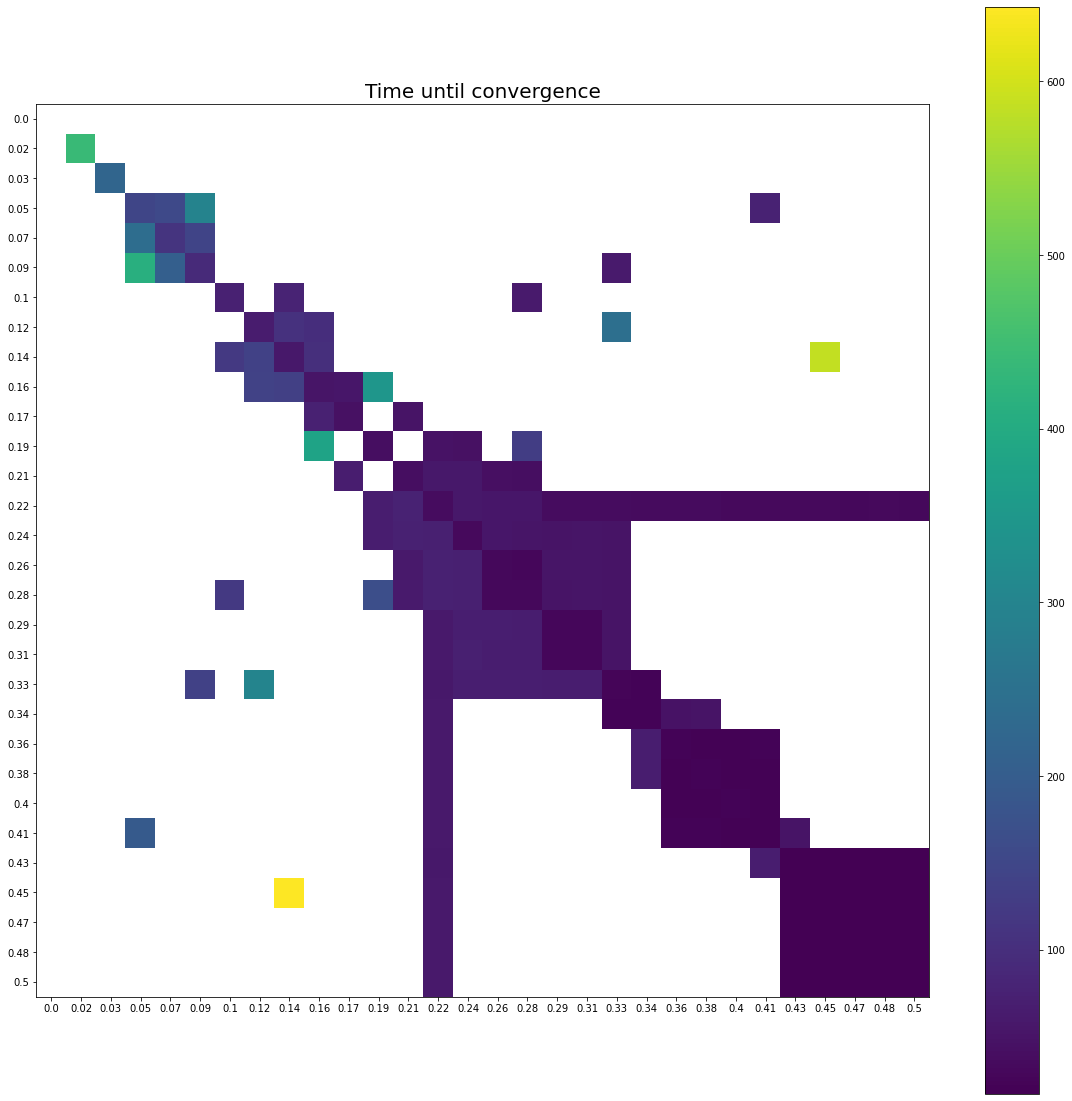

In [135]:
fig = plt.figure(figsize = (20,20))
import matplotlib
cmap2= plt.get_cmap('viridis') # Can be any colormap that you want after the cm
cmap2.set_bad(color='white')
masked_array = np.ma.masked_where(time_metric == -1, time_metric)

plt.imshow(masked_array,cmap=cmap2)
plt.xticks(range(30), labels= np.linspace(0,0.5,30).round(2))
plt.yticks(range(30), labels= np.linspace(0,0.5,30).round(2))
plt.title("Time until convergence",fontsize=20)
plt.colorbar()
plt.savefig("timeuntilconvergence")

plt.cmap()

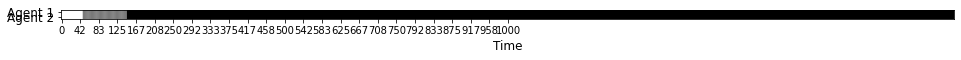

In [67]:

fig, ax = plt.subplots(figsize = (16,15))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,3,3,0].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 12)
ax.set_xticks(np.linspace(0,T,25),fontsize = 12)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 12)
plt.show()